In [31]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
data = pd.read_csv('gbm-data.csv')

In [4]:
y = data.Activity.values

In [5]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = data.loc[:, 'D1':]

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [22]:
def sigmoid(y_pred):
    return 1 / (1 + np.exp(-y_pred))


def loss(model, x_array, y_array):
    res = []
    for i in model.staged_decision_function(x_array):
        # noinspection PyShadowingNames,SpellCheckingInspection
        res.append(log_loss(y_array, [sigmoid(y_pred) for y_pred in i]))

    return res

      Iter       Train Loss   Remaining Time 
         1           1.0190           15.71s
         2           0.9192           13.45s
         3           0.8272           11.30s
         4           0.7834            9.76s
         5           0.7109            9.32s
         6           0.6368           10.11s
         7           0.5797            9.90s
         8           0.5610            9.18s
         9           0.5185            8.90s
        10           0.4984            8.44s
        20           0.1999            7.72s
        30           0.1313            7.34s
        40           0.0790            6.95s
        50           0.0511            6.56s
        60           0.0352            6.10s
        70           0.0245            5.63s
        80           0.0162            5.25s
        90           0.0114            4.90s
       100           0.0077            4.66s
       200           0.0004            1.33s
      Iter       Train Loss   Remaining Time 
        

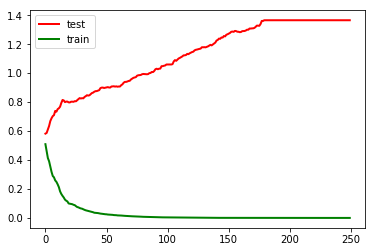

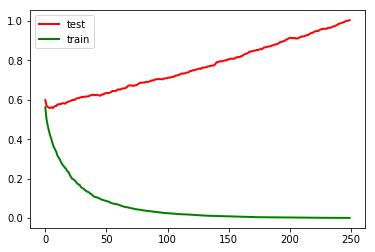

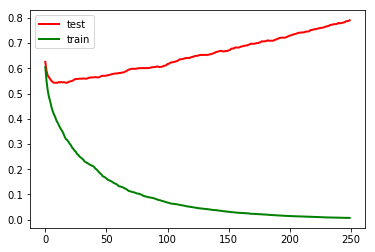

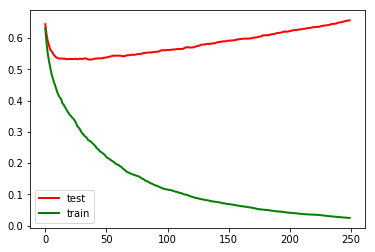

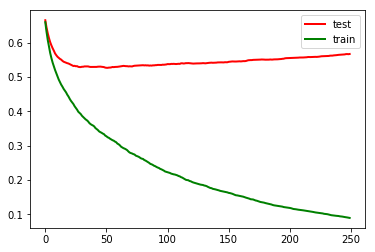

In [28]:
min_loss_val = 0
min_less_idx = 0

for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    model = GradientBoostingClassifier(
        n_estimators=250, 
        verbose=True, 
        random_state=241, 
        learning_rate=lr)
    
    model.fit(X_train, y_train)
    
    train_loss = loss(model, X_train, y_train)
    test_loss = loss(model, X_test, y_test)
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.savefig('figures/figure_' + str(lr) + '.png')
    
    if lr == 0.2:
        min_loss_val = min(test_loss)
        min_less_idx = test_loss.index(min_loss_val)

In [29]:
min_loss_val

0.531094637596885

In [30]:
min_less_idx

36

In [34]:
clf = RandomForestClassifier(n_estimators=min_less_idx, random_state=241)
clf.fit(X_train, y_train)
# noinspection SpellCheckingInspection
y_pred = clf.predict_proba(X_test)
loss = log_loss(y_test, y_pred)

In [35]:
loss

0.5413812861804069